Importing Necessary Packages

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('Solarize_Light2')

Uploading Dataset

In [6]:
df = pd.read_csv("malicious_phish.csv")

Examining the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [8]:
print('Shape of the dataset:', df.shape)

Shape of the dataset: (651191, 2)


In [9]:
df.tail()

,url,type
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


In [10]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [11]:
df.sample(n = 10)

,url,type
170778,http://www.bcm-shop.de/home.html?page=shop.pro...,defacement
431481,https://serverfault.com/questions/445390/some-...,benign
442985,http://peluqueriadeautor.com/index.php?page=sh...,defacement
619160,aws.amazon.com/documentation/,phishing
179728,myeasytv.com/movies/category/drama,benign
286839,http://zoetekroon.nl/wp-content/themes/simplo/...,malware
286350,douglasstewart.blogspot.com/,benign
537306,http://219.68.5.140:9646/.i,malware
307278,jkauctions.com/,benign
121570,antya.com/detail/Capital-Publishing-Company/23651,benign


Treating Missing Values

In [12]:
df.isnull().sum()

url     0
type    0
dtype: int64

Removing Duuplicates

In [13]:
# Removing Duplicates
dup = df.duplicated()
print('Before removing duplicates: ',df.shape)
data = df.drop_duplicates()
print('After removing duplicates: ',df.shape)

Before removing duplicates:  (651191, 2)
After removing duplicates:  (651191, 2)


Dealing with categorical Columns

In [14]:
df.select_dtypes('object').head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [15]:
# Changing the target variables into required format
df["url_type"] = df["type"].replace({
    'benign':0,
    'defacement':1,
    'phishing':2,
    'malware':3
});

In [16]:
# Removing www from URL
df["url"] = df["url"].replace("www","",regex=True)

print(df.head())

                                                 url        type  url_type
0                                   br-icloud.com.br    phishing         2
1                mp3raid.com/music/krizz_kaliko.html      benign         0
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0
3  http://.garage-pirenne.be/index.php?option=com...  defacement         1
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1


In [17]:
# extracts the primary domain from a given URL by parsing it and returning the last two segments of the domain name

from urllib.parse import urlparse

def extract_pri_domain(url):
    try:
        parsed_url = urlparse(url)
        netloc = parsed_url.netloc
        parts = netloc.split('.')

        if len(parts) >= 2:
            pri_domain = f"{parts[-2]}.{parts[-1]}"
        else:
            pri_domain = None

    except Exception as e:
        print(f"An error occurred: {e}")
        pri_domain = None

    return pri_domain

df['pri_domain'] = df['url'].apply(extract_pri_domain)

In [18]:
df.isnull().sum()

url                0
type               0
url_type           0
pri_domain    463192
dtype: int64

In [19]:
df.fillna('0',inplace=True)
df.isnull().sum()

url           0
type          0
url_type      0
pri_domain    0
dtype: int64

In [20]:
# identifies URLs with potentially abnormal structures by checking if the network location appears in the URL
from urllib.parse import urlparse

def abnormal_url(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc

    if netloc and netloc in url:
        return 1
    return 0
df['abnormal_url'] = df['url'].apply(abnormal_url)

In [21]:
# To count letters, digits and special characters in a URL
def count_letters(url):
    return sum(char.isalpha() for char in url)

def count_digits(url):
    return sum(char.isdigit() for char in url)

import string

def count_special_chars(url):
    return sum(char in string.punctuation for char in url)

df['letters_count'] = df['url'].apply(count_letters)
df['digits_count'] = df['url'].apply(count_digits)
df['special_chars_count'] = df['url'].apply(count_special_chars)

In [22]:
# To find from which part of world the URL is

def get_url_region(primary_domain):
    ccTLD_to_region = {
        ".ac": "Ascension Island",
        ".ad": "Andorra",
        ".ae": "United Arab Emirates",
        ".af": "Afghanistan",
        ".ag": "Antigua and Barbuda",
        ".ai": "Anguilla",
        ".al": "Albania",
        ".am": "Armenia",
        ".an": "Netherlands Antilles",
        ".ao": "Angola",
        ".aq": "Antarctica",
        ".ar": "Argentina",
        ".as": "American Samoa",
        ".at": "Austria",
        ".au": "Australia",
        ".aw": "Aruba",
        ".ax": "Åland Islands",
        ".az": "Azerbaijan",
        ".ba": "Bosnia and Herzegovina",
        ".bb": "Barbados",
        ".bd": "Bangladesh",
        ".be": "Belgium",
        ".bf": "Burkina Faso",
        ".bg": "Bulgaria",
        ".bh": "Bahrain",
        ".bi": "Burundi",
        ".bj": "Benin",
        ".bm": "Bermuda",
        ".bn": "Brunei Darussalam",
        ".bo": "Bolivia",
        ".br": "Brazil",
        ".bs": "Bahamas",
        ".bt": "Bhutan",
        ".bv": "Bouvet Island",
        ".bw": "Botswana",
        ".by": "Belarus",
        ".bz": "Belize",
        ".ca": "Canada",
        ".cc": "Cocos Islands",
        ".cd": "Democratic Republic of the Congo",
        ".cf": "Central African Republic",
        ".cg": "Republic of the Congo",
        ".ch": "Switzerland",
        ".ci": "Côte d'Ivoire",
        ".ck": "Cook Islands",
        ".cl": "Chile",
        ".cm": "Cameroon",
        ".cn": "China",
        ".co": "Colombia",
        ".cr": "Costa Rica",
        ".cu": "Cuba",
        ".cv": "Cape Verde",
        ".cw": "Curaçao",
        ".cx": "Christmas Island",
        ".cy": "Cyprus",
        ".cz": "Czech Republic",
        ".de": "Germany",
        ".dj": "Djibouti",
        ".dk": "Denmark",
        ".dm": "Dominica",
        ".do": "Dominican Republic",
        ".dz": "Algeria",
        ".ec": "Ecuador",
        ".ee": "Estonia",
        ".eg": "Egypt",
        ".er": "Eritrea",
        ".es": "Spain",
        ".et": "Ethiopia",
        ".eu": "European Union",
        ".fi": "Finland",
        ".fj": "Fiji",
        ".fk": "Falkland Islands",
        ".fm": "Federated States of Micronesia",
        ".fo": "Faroe Islands",
        ".fr": "France",
        ".ga": "Gabon",
        ".gb": "United Kingdom",
        ".gd": "Grenada",
        ".ge": "Georgia",
        ".gf": "French Guiana",
        ".gg": "Guernsey",
        ".gh": "Ghana",
        ".gi": "Gibraltar",
        ".gl": "Greenland",
        ".gm": "Gambia",
        ".gn": "Guinea",
        ".gp": "Guadeloupe",
        ".gq": "Equatorial Guinea",
        ".gr": "Greece",
        ".gs": "South Georgia and the South Sandwich Islands",
        ".gt": "Guatemala",
        ".gu": "Guam",
        ".gw": "Guinea-Bissau",
        ".gy": "Guyana",
        ".hk": "Hong Kong",
        ".hm": "Heard Island and McDonald Islands",
        ".hn": "Honduras",
        ".hr": "Croatia",
        ".ht": "Haiti",
        ".hu": "Hungary",
        ".id": "Indonesia",
        ".ie": "Ireland",
        ".il": "Israel",
        ".im": "Isle of Man",
        ".in": "India",
        ".io": "British Indian Ocean Territory",
        ".iq": "Iraq",
        ".ir": "Iran",
        ".is": "Iceland",
        ".it": "Italy",
        ".je": "Jersey",
        ".jm": "Jamaica",
        ".jo": "Jordan",
        ".jp": "Japan",
        ".ke": "Kenya",
        ".kg": "Kyrgyzstan",
        ".kh": "Cambodia",
        ".ki": "Kiribati",
        ".km": "Comoros",
        ".kn": "Saint Kitts and Nevis",
        ".kp": "Democratic People's Republic of Korea (North Korea)",
        ".kr": "Republic of Korea (South Korea)",
        ".kw": "Kuwait",
        ".ky": "Cayman Islands",
        ".kz": "Kazakhstan",
        ".la": "Laos",
        ".lb": "Lebanon",
        ".lc": "Saint Lucia",
        ".li": "Liechtenstein",
        ".lk": "Sri Lanka",
        ".lr": "Liberia",
        ".ls": "Lesotho",
        ".lt": "Lithuania",
        ".lu": "Luxembourg",
        ".lv": "Latvia",
        ".ly": "Libya",
        ".ma": "Morocco",
        ".mc": "Monaco",
        ".md": "Moldova",
        ".me": "Montenegro",
        ".mf": "Saint Martin (French part)",
        ".mg": "Madagascar",
        ".mh": "Marshall Islands",
        ".mk": "North Macedonia",
        ".ml": "Mali",
        ".mm": "Myanmar",
        ".mn": "Mongolia",
        ".mo": "Macao",
        ".mp": "Northern Mariana Islands",
        ".mq": "Martinique",
        ".mr": "Mauritania",
        ".ms": "Montserrat",
        ".mt": "Malta",
        ".mu": "Mauritius",
        ".mv": "Maldives",
        ".mw": "Malawi",
        ".mx": "Mexico",
        ".my": "Malaysia",
        ".mz": "Mozambique",
        ".na": "Namibia",
        ".nc": "New Caledonia",
        ".ne": "Niger",
        ".nf": "Norfolk Island",
        ".ng": "Nigeria",
        ".ni": "Nicaragua",
        ".nl": "Netherlands",
        ".no": "Norway",
        ".np": "Nepal",
        ".nr": "Nauru",
        ".nu": "Niue",
        ".nz": "New Zealand",
        ".om": "Oman",
        ".pa": "Panama",
        ".pe": "Peru",
        ".pf": "French Polynesia",
        ".pg": "Papua New Guinea",
        ".ph": "Philippines",
        ".pk": "Pakistan",
        ".pl": "Poland",
        ".pm": "Saint Pierre and Miquelon",
        ".pn": "Pitcairn",
        ".pr": "Puerto Rico",
        ".ps": "Palestinian Territory",
        ".pt": "Portugal",
        ".pw": "Palau",
        ".py": "Paraguay",
        ".qa": "Qatar",
        ".re": "Réunion",
        ".ro": "Romania",
        ".rs": "Serbia",
        ".ru": "Russia",
        ".rw": "Rwanda",
        ".sa": "Saudi Arabia",
        ".sb": "Solomon Islands",
        ".sc": "Seychelles",
        ".sd": "Sudan",
        ".se": "Sweden",
        ".sg": "Singapore",
        ".sh": "Saint Helena",
        ".si": "Slovenia",
        ".sj": "Svalbard and Jan Mayen",
        ".sk": "Slovakia",
        ".sl": "Sierra Leone",
        ".sm": "San Marino",
        ".sn": "Senegal",
        ".so": "Somalia",
        ".sr": "Suriname",
        ".ss": "South Sudan",
        ".st": "São Tomé and Príncipe",
        ".sv": "El Salvador",
        ".sx": "Sint Maarten (Dutch part)",
        ".sy": "Syria",
        ".sz": "Eswatini",
        ".tc": "Turks and Caicos Islands",
        ".td": "Chad",
        ".tf": "French Southern Territories",
        ".tg": "Togo",
        ".th": "Thailand",
        ".tj": "Tajikistan",
        ".tk": "Tokelau",
        ".tl": "Timor-Leste",
        ".tm": "Turkmenistan",
        ".tn": "Tunisia",
        ".to": "Tonga",
        ".tr": "Turkey",
        ".tt": "Trinidad and Tobago",
        ".tv": "Tuvalu",
        ".tw": "Taiwan",
        ".tz": "Tanzania",
        ".ua": "Ukraine",
        ".ug": "Uganda",
        ".uk": "United Kingdom",
        ".us": "United States",
        ".uy": "Uruguay",
        ".uz": "Uzbekistan",
        ".va": "Vatican City",
        ".vc": "Saint Vincent and the Grenadines",
        ".ve": "Venezuela",
        ".vg": "British Virgin Islands",
        ".vi": "U.S. Virgin Islands",
        ".vn": "Vietnam",
        ".vu": "Vanuatu",
        ".wf": "Wallis and Futuna",
        ".ws": "Samoa",
        ".ye": "Yemen",
        ".yt": "Mayotte",
        ".za": "South Africa",
        ".zm": "Zambia",
        ".zw": "Zimbabwe"
    }
    sorted_tld_keys = sorted(ccTLD_to_region.keys(), key=len, reverse=True)

    for ccTLD in sorted_tld_keys:
        if primary_domain.lower().endswith(ccTLD):
            return ccTLD_to_region[ccTLD]

    return "Global"

df['url_region'] = df['pri_domain'].apply(get_url_region)

In [23]:
# Is URL is HTTP secured or not

def is_http_secure(url):
    return int(urlparse(url).scheme == 'https')

df['is_http_secure'] = df['url'].apply(is_http_secure)

In [24]:
# Extract root domain
def extract_root_domain(url):
    try:
        parsed_url = urlparse(url)
        netloc = parsed_url.netloc if parsed_url.netloc else url.split('/')[0]  # Eğer netloc boşsa, ilk kısmı al
        parts = netloc.split('.')
        if len(parts) >= 2:
            root_domain = f"{parts[-2]}.{parts[-1]}"
        else:
            root_domain = "0"
    except Exception as e:
        print(f"An error occurred: {e}")
        root_domain = "0"
    return root_domain

df['root_domain'] = df['url'].apply(extract_root_domain)

In [25]:
# Finding duplicates and dropping them off
print(df.duplicated().sum())
df = df[df['root_domain'] != '0']
print(df['root_domain'].value_counts())
df.drop_duplicates(inplace=True)

10072
wikipedia.org                13426
co.uk                        10036
youtube.com                   8639
facebook.com                  8366
blogspot.com                  8264
                             ...  
huapala.org                      1
norwoodlaw.com                   1
handvband.com                    1
innerbalance-training.com        1
xboxaddict.com                   1
Name: root_domain, Length: 144132, dtype: int64


In [26]:
# hash encoding
import hashlib
def hash_encode(category: str, bits: int = 24) -> int:
    hash_object = hashlib.md5(category.encode())
    hash_value = int(hash_object.hexdigest(), 16)
    return hash_value % (1 << bits)

In [27]:
df['root_domain'] = df['root_domain'].apply(hash_encode)
df['url_region'] = df['url_region'].apply(hash_encode)

In [28]:
df = df.drop(columns=["url", "pri_domain","type"])

In [29]:
df.head()

,url_type,abnormal_url,letters_count,digits_count,special_chars_count,url_region,is_http_secure,root_domain
0,2,0,13,0,3,6617800,0,1711358
1,0,0,29,1,5,6617800,0,4090175
2,0,0,25,1,5,6617800,0,13299758
3,1,1,60,7,18,410023,0,7849850
4,1,1,199,22,14,6617800,0,7752359


Descriptive Statastics

In [30]:
df.describe().style.background_gradient(cmap = 'copper')

,url_type,abnormal_url,letters_count,digits_count,special_chars_count,url_region,is_http_secure,root_domain
count,641054.000000,641054.000000,641054.000000,641054.000000,641054.000000,641054.000000,641054.000000,641054.000000
mean,0.552688,0.277594,44.600286,5.372011,9.205544,6775470.363614,0.024393,8189206.011941
std,0.872865,0.447813,31.534436,11.630724,7.803802,1572375.400310,0.154265,4728210.547203
min,0.000000,0.000000,0.000000,0.000000,1.000000,68101.000000,0.000000,267.000000
25%,0.000000,0.000000,25.000000,0.000000,4.000000,6617800.000000,0.000000,3917374.000000
50%,0.000000,0.000000,36.000000,2.000000,7.000000,6617800.000000,0.000000,8417775.000000
75%,1.000000,1.000000,57.000000,6.000000,12.000000,6617800.000000,0.000000,12186709.000000
max,3.000000,1.000000,2141.000000,1204.000000,372.000000,16611279.000000,1.000000,16777124.000000


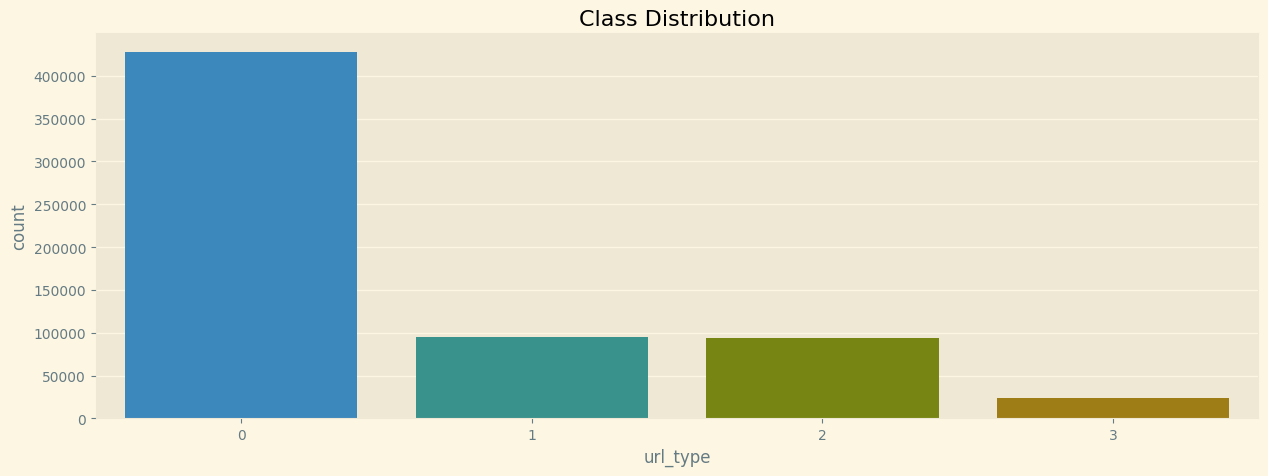

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='url_type', data=df)
plt.title('Class Distribution')
plt.show()

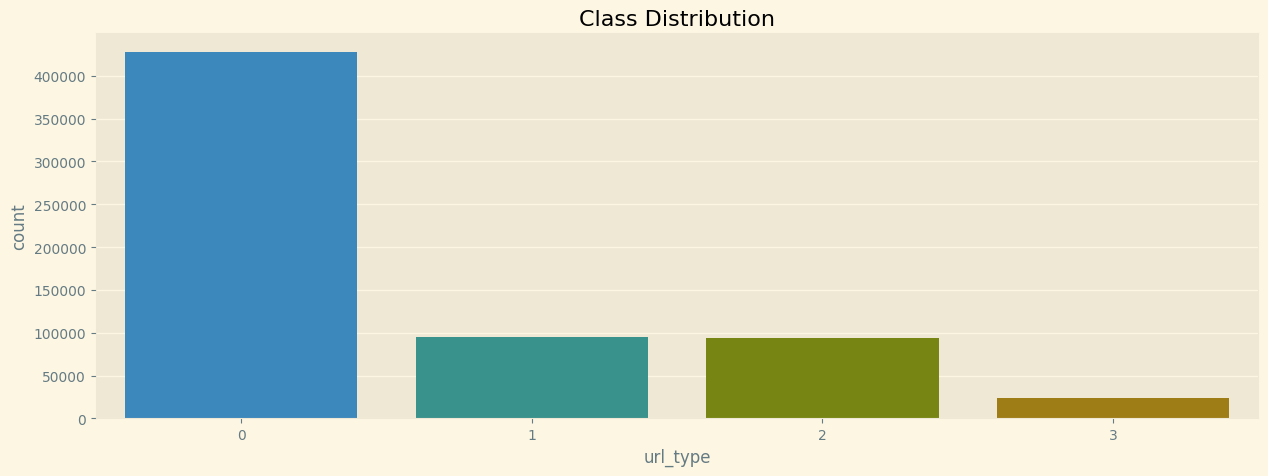

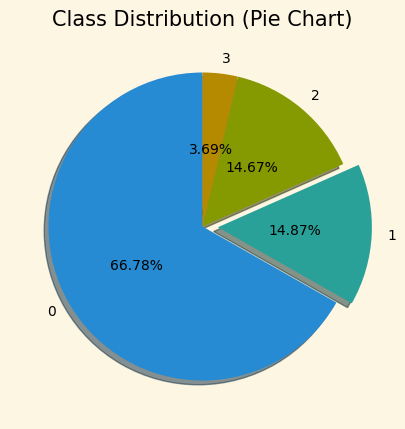

In [32]:
# Count plot for class distribution (already done in your previous code)
sns.countplot(x='url_type', data=df)
plt.title('Class Distribution')
plt.show()

# Create a pie chart for the class distribution
plt.figure(figsize=(10, 5))  # New figure for the pie chart
df['url_type'].value_counts().plot(
    kind='pie',
    explode=[0, 0.1, 0, 0],  # Adjust based on the number of classes (highlight the second class)
    autopct='%.2f%%',
    startangle=90,
    labels=df['url_type'].value_counts().index,  # Use the index for labels
    shadow=True,
    pctdistance=0.5
)
plt.axis('off')  # Hide the axes
plt.title('Class Distribution (Pie Chart)', fontsize=15)  # Title for the pie chart
plt.show()

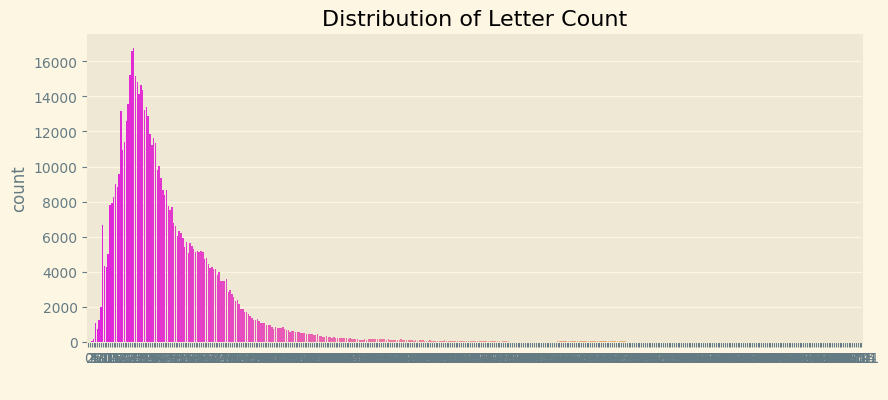

In [33]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.countplot(x = df['letters_count'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Letter Count')
plt.show()

<Axes: xlabel='url_type', ylabel='count'>

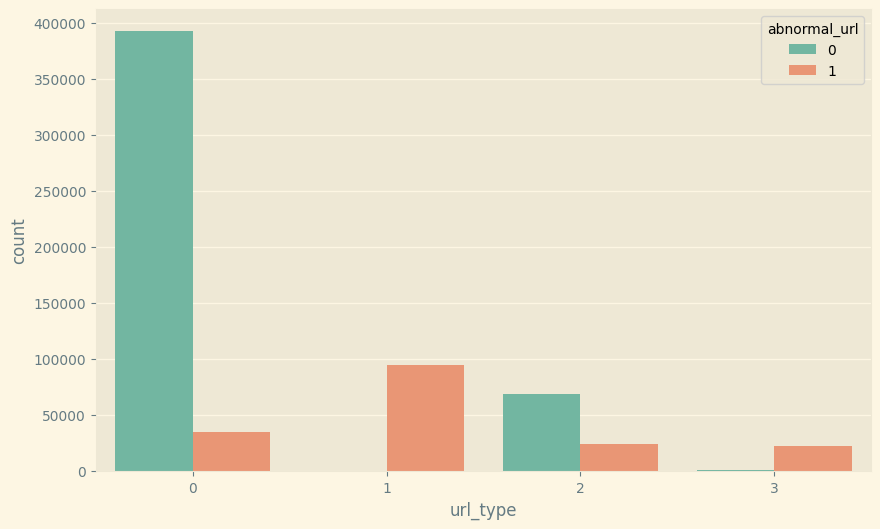

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='url_type', hue='abnormal_url', palette='Set2')

Multivariate Analysis

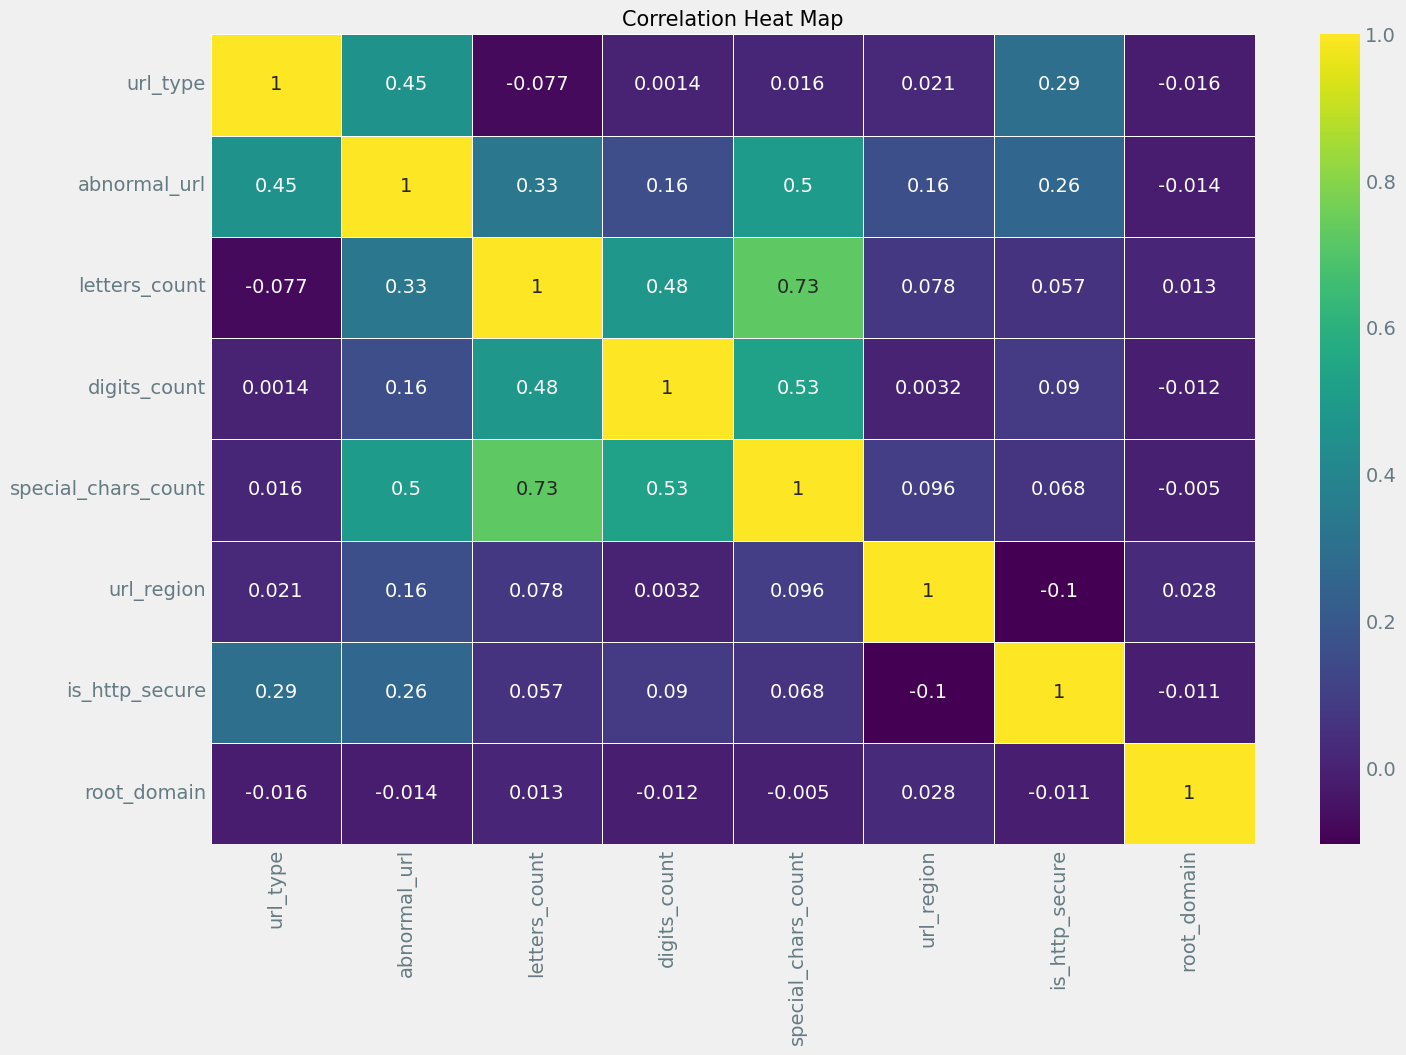

In [35]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = 'viridis')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [ ]:
print(X)

BEST-MODEL(Stacked ensemble combining an XGBoost classifier with a neural network)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb


# Create a random dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
# Train an XGBoost classifier
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have predictions from XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Combine features
X_test_combined = np.column_stack((X_test, xgb_predictions))

# Build a new neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_test_combined.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile and fit the new model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_test_combined, y_test, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 2s 61ms/step - loss: 0.7460 - accuracy: 0.5350 - val_loss: 0.6541 - val_accuracy: 0.5600
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6455 - accuracy: 0.5550 - val_loss: 0.5960 - val_accuracy: 0.6400
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5706 - accuracy: 0.6650 - val_loss: 0.5537 - val_accuracy: 0.7200
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5149 - accuracy: 0.7900 - val_loss: 0.5163 - val_accuracy: 0.7400
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4670 - accuracy: 0.8400 - val_loss: 0.4843 - val_accuracy: 0.7400
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.4266 - accuracy: 0.8650 - val_loss: 0.4555 - val_accuracy: 0.8200
Epoch 7/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3896 - accuracy: 0.8900 - val_loss: 0.4337 - val_accuracy: 0.8400
Epoch 8/50
7/7 [===========

In [38]:
# Make predictions with the neural network
nn_predictions = model.predict(X_test_combined)

# Convert predictions to binary (0 or 1)
nn_predictions_binary = (nn_predictions > 0.5).astype(int)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, nn_predictions_binary)
precision = precision_score(y_test, nn_predictions_binary)
recall = recall_score(y_test, nn_predictions_binary)
f1 = f1_score(y_test, nn_predictions_binary)
conf_matrix = confusion_matrix(y_test, nn_predictions_binary)

# Print the results
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

8/8 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.9520
Precision: 0.9624
Recall: 0.9481
F1 Score: 0.9552
Confusion Matrix:
[[110   5]
 [  7 128]]


In [ ]:
# saving the model
from joblib import dump
dump(model, 'model.h5')